#Tic-Tac-Toe and Chill
This is a dataset which contains details of 958 matches of tic-tac-toe to predict if the first mover will win the match or not. So, to solve this binary classification problem the analysis has been performed. 

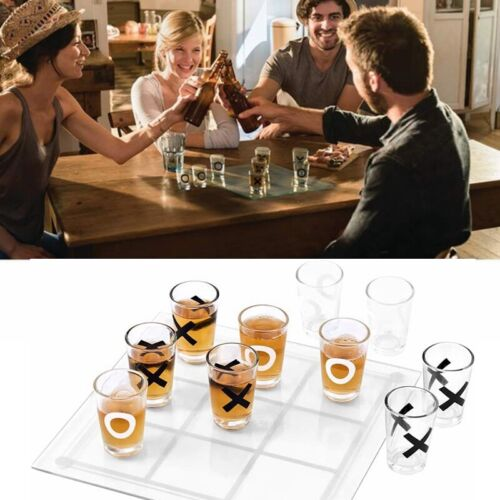

###Step 1: Import libraries

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

###Step 2: Import dataset

In [42]:
from sklearn.datasets import fetch_openml

In [43]:
df = fetch_openml(data_id = 50)

###Step 3: Define variables

In [44]:
y = df.target

In [45]:
X = df.data

In [ ]:
y

In [89]:
X

,top-left-square,top-middle-square,top-right-square,middle-left-square,middle-middle-square,middle-right-square,bottom-left-square,bottom-middle-square,bottom-right-square
0,x,x,x,x,o,o,x,o,o
1,x,x,x,x,o,o,o,x,o
2,x,x,x,x,o,o,o,o,x
3,x,x,x,x,o,o,o,b,b
4,x,x,x,x,o,o,b,o,b
...,...,...,...,...,...,...,...,...,...
953,o,x,x,x,o,o,o,x,x
954,o,x,o,x,x,o,x,o,x
955,o,x,o,x,o,x,x,o,x
956,o,x,o,o,x,x,x,o,x


###Step 4: Ordinal Encoding for attributes

In [48]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()
X=oe.fit_transform(X)

###Step 5: Splitting dataset

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
X_train, X_test,  y_train,y_test=train_test_split(X,y,train_size=0.7,random_state=2529)

#Logistic Regression

###Step 6: Define model

In [51]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

###Step 7: Training the model

In [52]:
model.fit(X_train,y_train)

LogisticRegression()

###Step 8: Testing the model 

In [53]:
y_pred=model.predict(X_test)

###Step 9: Accuracy check 

In [54]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

    negative       0.73      0.31      0.44       102
    positive       0.71      0.94      0.81       186

    accuracy                           0.72       288
   macro avg       0.72      0.62      0.62       288
weighted avg       0.72      0.72      0.68       288



#kNN

In [55]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)

In [ ]:
knn.fit(X_train,y_train)

In [57]:
y_pred = knn.predict(X_test)

In [58]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

    negative       0.84      0.62      0.71       102
    positive       0.82      0.94      0.87       186

    accuracy                           0.82       288
   macro avg       0.83      0.78      0.79       288
weighted avg       0.83      0.82      0.82       288



#Naive bayes

In [59]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

In [60]:
model.fit(X_train,y_train)

GaussianNB()

In [61]:
y_pred= model.predict(X_test)

In [62]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

    negative       0.85      0.22      0.34       102
    positive       0.69      0.98      0.81       186

    accuracy                           0.71       288
   macro avg       0.77      0.60      0.58       288
weighted avg       0.75      0.71      0.65       288



#Decision Tree

In [73]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
model = DecisionTreeClassifier(max_depth=3)

In [74]:
model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [75]:
y_pred=model.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
confusion_matrix(y_test,y_pred)

In [77]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

    negative       0.64      0.34      0.45       102
    positive       0.71      0.89      0.79       186

    accuracy                           0.70       288
   macro avg       0.67      0.62      0.62       288
weighted avg       0.69      0.70      0.67       288



In [79]:
X = df.data

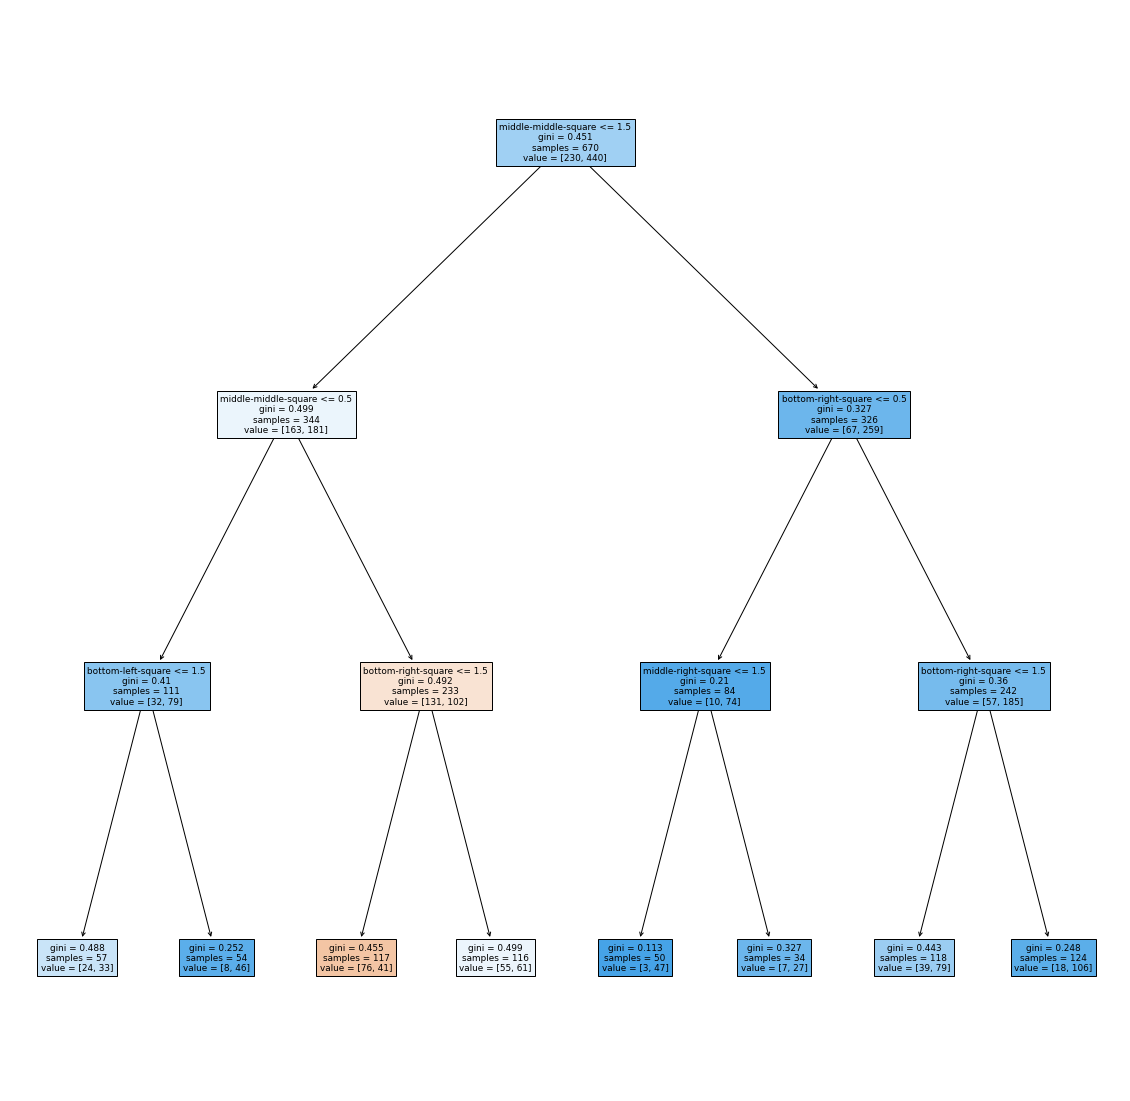

In [81]:
fig,ax = plt.subplots(figsize=(20,20))
plot_tree(model,feature_names=pd.DataFrame(X).columns,filled=True);

#Random Forest

In [82]:
from sklearn.ensemble import RandomForestClassifier

In [83]:
model = RandomForestClassifier()

In [ ]:
model.fit(X_train,y_train)

In [85]:
y_pred=model.predict(X_test)

In [86]:
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
confusion_matrix(y_test,y_pred)

In [88]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

    negative       0.99      0.85      0.92       102
    positive       0.93      0.99      0.96       186

    accuracy                           0.94       288
   macro avg       0.96      0.92      0.94       288
weighted avg       0.95      0.94      0.94       288



#Conclusion
The dataset has been trained and tested on different models like Logistic, kNN, Naive Bayes, Decision Tree and Random Forest. And results of Random Forest has given highest precision of 93% for winning outcome. I have considered my results on the basis of precision of winning outcome because the purpose of performing analysis was to identify that if i will win or not based on my first move. Now, if a new match has to be played then there are 93% chances that it will give positive results.